<a href="https://colab.research.google.com/github/Abdullah-Arshad1/neural_net/blob/computer_vision/NLP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:
import requests
import json
import os
import matplotlib.pyplot as plt

In [ ]:
url = "https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt"
local_dir = r'C:\Users\Abdullah\Desktop\Neural Network\NLP\lab4\irish-lyrics-eof.txt'

response = requests.get(url)
response.raise_for_status()

with open(local_dir, 'wb') as file:
    file.write(response.content)

In [ ]:
local_dir = r'C:\Users\Abdullah\Desktop\Neural Network\NLP\lab4\irish-lyrics-eof.txt'

datastore = open(local_dir).read()
print(datastore)

Come all ye maidens young and fair
And you that are blooming in your prime
Always beware and keep your garden fair
Let no man steal away your thyme
For thyme it is a precious thing
And thyme brings all things to my mind
nlyme with all its flavours, along with all its joys
Thyme, brings all things to my mind
Once I and a bunch of thyme
i thought it never would decay
Then came a lusty sailor
Who chanced to pass my way
And stole my bunch of thyme away
The sailor gave to me a rose
A rose that never would decay
He gave it to me to keep me reminded
Of when he stole my thyme away
Sleep, my child, and peace attend thee
All through the night
Guardian angels God will send thee
Soft the drowsy hours are creeping
Hill and dale in slumber sleeping
I my loving vigil keeping
While the moon her watch is keeping
While the weary world is sleeping
Oer thy spirit gently stealing
Visions of delight revealing
Breathes a pure and holy feeling
Though I roam a minstrel lonely
My true harp shall praise sing onl

In [ ]:
tokenizer = Tokenizer()
corpus = datastore.lower().split('\n')

In [ ]:
print(corpus)

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

In [ ]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
input_seq = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram = token_list[:i+1]
        input_seq.append(n_gram)

print(input_seq)

max_input_seq = max([len(i) for i in input_seq])
input_seq = pad_sequences(input_seq, maxlen=max_input_seq,padding='pre')
input_seq = np.array(input_seq)

print(input_seq)


[[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 17, 12, 75], [1219, 17, 12, 75, 1220], [1219, 17, 12, 75, 1220, 236], [1219, 17, 12, 75, 1220, 236, 17], [1219, 17, 12, 75, 1220, 236

In [ ]:
xs = input_seq[:,:-1]
label = input_seq[:,-1]
ys = tf.keras.utils.to_categorical(label, num_classes=total_words)

In [ ]:
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=100, input_length=max_input_seq-1),
    tf.keras.layers.Bidirectional(LSTM(150, return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(150)),
    tf.keras.layers.Dense(total_words, activation='softmax')
])


c:\Users\Abdullah\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("Shape of xs:", xs.shape)
print("Shape of ys:", ys.shape)

Shape of xs: (12038, 15)
Shape of ys: (12038, 2690)


In [ ]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 50s 108ms/step - accuracy: 0.0569 - loss: 6.9505
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.0696 - loss: 6.2315
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - accuracy: 0.0884 - loss: 5.9458
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 74s 197ms/step - accuracy: 0.1029 - loss: 5.7147
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 74s 196ms/step - accuracy: 0.1128 - loss: 5.5053
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 73s 192ms/step - accuracy: 0.1194 - loss: 5.3605
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 67s 178ms/step - accuracy: 0.1258 - loss: 5.1916
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 72s 191ms/step - accuracy: 0.1366 - loss: 4.9728
Epoch 9/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 68s 179ms/step - accuracy: 0.1395 - loss: 4.7843
Epoch 10/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 73s 192ms/step - accuracy: 0.1481 - loss: 4.6068
Epoch 11/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 56s 149ms/step - accuracy: 0.1608 - loss: 4.4374
Epoch 12

In [ ]:
model.save('model_rnn.keras')
model.save('model_rnn.h5')

In [ ]:

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

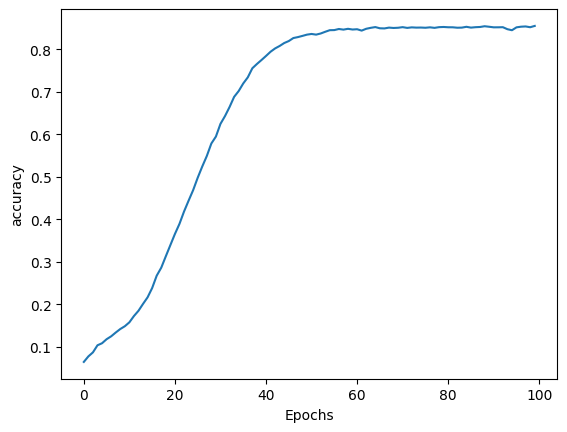

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_input_seq-1, padding='pre')

	predicted = np.argmax(model.predict(token_list), axis=-1)                 #---------------prediction
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━